In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')



In [305]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [306]:
from sklearn.preprocessing import LabelEncoder


In [307]:
df_main=pd.read_csv('IBM.csv')
df_main.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [308]:
df=df_main.copy()

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [310]:
df['Attrition']=df['Attrition'].map({'Yes':1,'No':0})

In [311]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### EDA

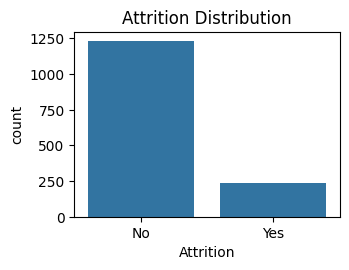

In [312]:
# Plot 1: Attrition Count
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Attrition')
plt.title("Attrition Distribution")
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()

In [313]:
df['Attrition'].value_counts()

,count
Attrition,
0,1233
1,237


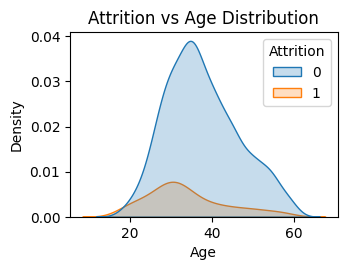

In [314]:
# Plot 2: Attrition vs Age
plt.subplot(2, 2, 2)
sns.kdeplot(data=df, x="Age", hue="Attrition", fill=True)
plt.title("Attrition vs Age Distribution")
plt.tight_layout()


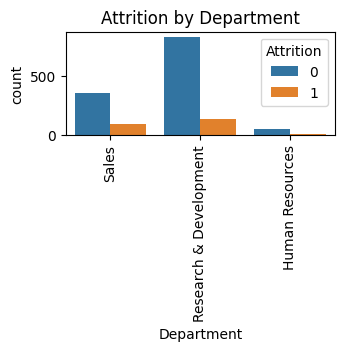

In [315]:
# Plot 3: Attrition by Department
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title("Attrition by Department")
plt.xticks(rotation=90)
plt.tight_layout()

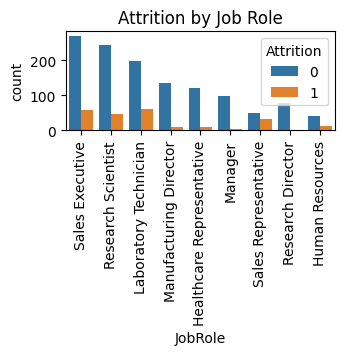

In [316]:
# Plot 4: Attrition by Job Role
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='JobRole', hue='Attrition')
plt.title("Attrition by Job Role")
plt.xticks(rotation=90)
plt.tight_layout()

In [317]:
df.select_dtypes(include='object').columns.tolist()


['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [318]:
categorical_cols = [
    'BusinessTravel',
    'Department',
    'EducationField',
    'Gender',
    'JobRole',
    'MaritalStatus',
    'Over18',
    'OverTime'
]

for col in categorical_cols:
    print(f"\n🟦 Value counts for '{col}':\n")
    print(df[col].value_counts())



🟦 Value counts for 'BusinessTravel':

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

🟦 Value counts for 'Department':

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

🟦 Value counts for 'EducationField':

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

🟦 Value counts for 'Gender':

Gender
Male      882
Female    588
Name: count, dtype: int64

🟦 Value counts for 'JobRole':

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64



In [319]:
df[['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']]


,EmployeeNumber,EmployeeCount,Over18,StandardHours
0,1,1,Y,80
1,2,1,Y,80
2,4,1,Y,80
3,5,1,Y,80
4,7,1,Y,80
...,...,...,...,...
1465,2061,1,Y,80
1466,2062,1,Y,80
1467,2064,1,Y,80
1468,2065,1,Y,80


Basic Cleaning

- Drop irrelevant columns like:

In [320]:
df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)


### Feature Extraction


In [321]:
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})


In [322]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,1,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,1,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,0,...,3,4,1,6,3,3,2,2,2,2


### Apply One-Hot Encoding

In [323]:
df = pd.get_dummies(df, columns=[
    'BusinessTravel',
    'Department',
    'EducationField',
    'JobRole'
], drop_first=True,dtype=int)


In [324]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1,1102,1,2,2,1,94,3,2,...,0,0,0,0,0,0,0,0,1,0
1,49,0,279,8,1,3,0,61,2,2,...,0,0,0,0,0,0,0,1,0,0
2,37,1,1373,2,2,4,0,92,2,1,...,1,0,0,1,0,0,0,0,0,0
3,33,0,1392,3,4,4,1,56,3,1,...,0,0,0,0,0,0,0,1,0,0
4,27,0,591,2,1,1,0,40,3,1,...,0,0,0,1,0,0,0,0,0,0


In [325]:
df = pd.get_dummies(df, columns=['MaritalStatus'], drop_first=True)



### Check: Correlation Heatmap

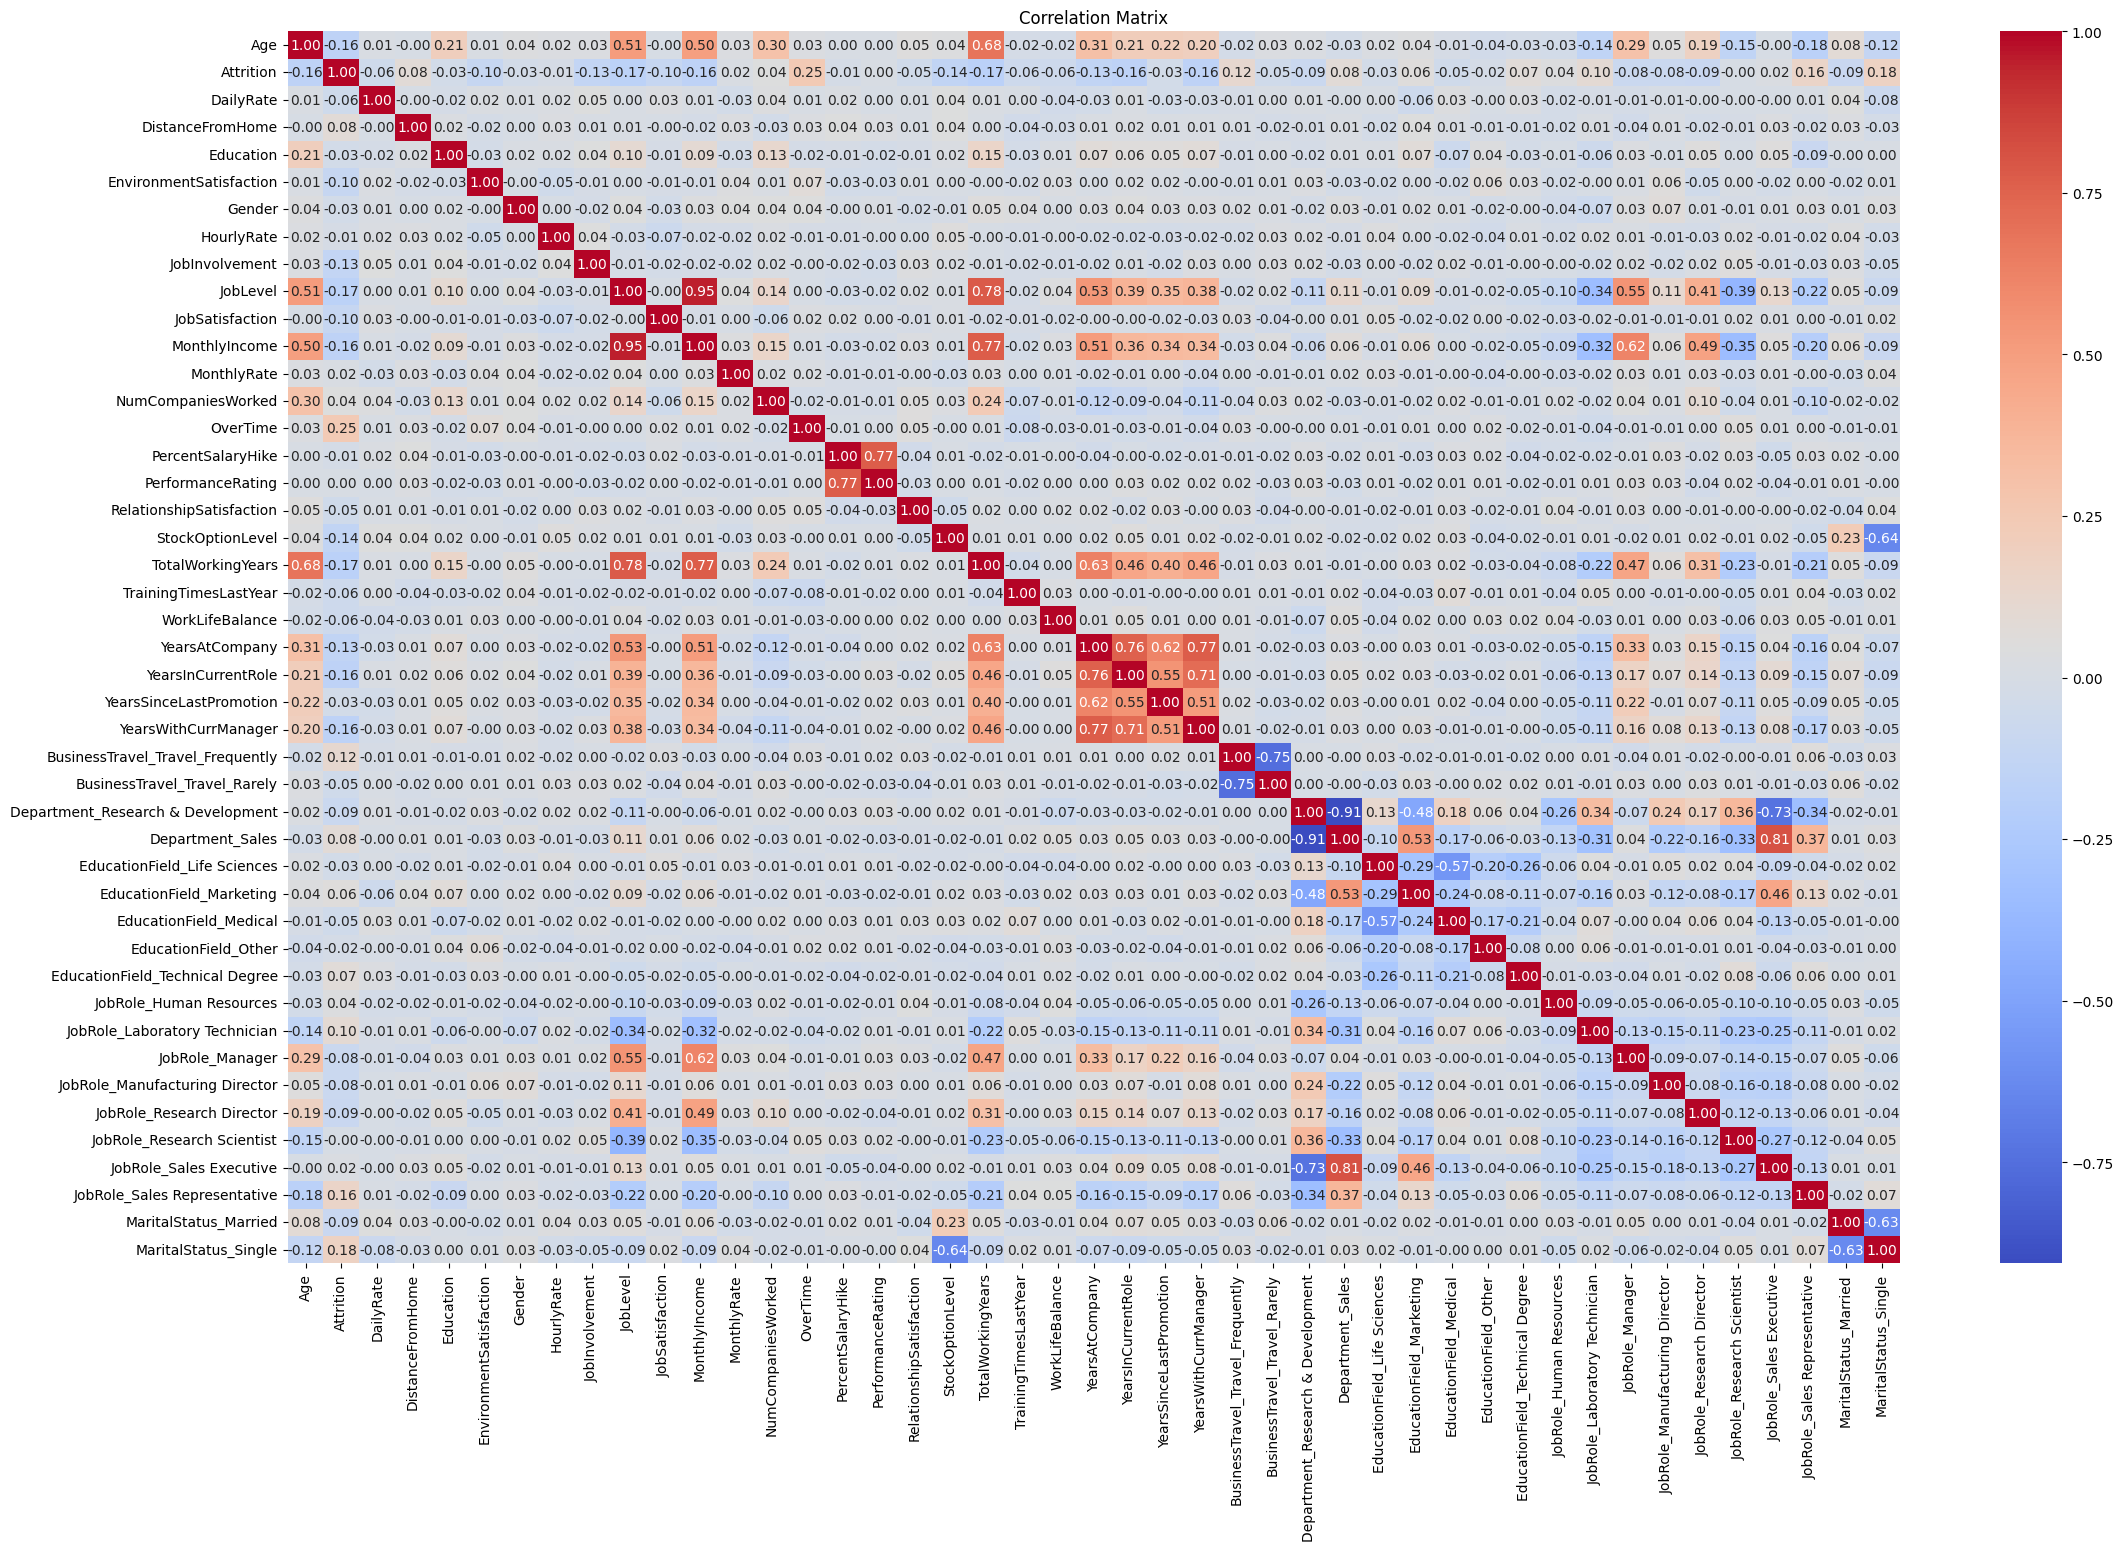

<Figure size 640x480 with 0 Axes>

In [326]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(26, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
plt.tight_layout()


In [327]:

target_corr = df.corr()['Attrition'].sort_values(ascending=False)
target_corr


,Attrition
Attrition,1.000000
OverTime,0.246118
MaritalStatus_Single,0.175419
JobRole_Sales Representative,0.157234
BusinessTravel_Travel_Frequently,0.115143
JobRole_Laboratory Technician,0.098290
Department_Sales,0.080855
DistanceFromHome,0.077924
EducationField_Technical Degree,0.069355
EducationField_Marketing,0.055781


### Best Feature List (mixed correlation)

| Feature                                | Corr with Attrition | Reason                               |
| -------------------------------------- | ------------------- | ------------------------------------ |
| **OverTime**                           | +0.246              | Employees doing overtime leave more  |
| **MaritalStatus\_Single**              | +0.175              | Single employees show more attrition |
| **JobRole\_Sales Representative**      | +0.157              | More likely to leave than others     |
| **BusinessTravel\_Travel\_Frequently** | +0.115              | High travel → higher attrition       |
| **TotalWorkingYears**                  | -0.171              | Experienced employees stay           |
| **JobLevel**                           | -0.169              | Higher job level = less attrition    |
| **YearsInCurrentRole**                 | -0.160              | Longer in current role = more stable |
| **MonthlyIncome**                      | -0.159              | More salary = more likely to stay    |
| **Age**                                | -0.159              | Older employees stay longer          |
| **YearsWithCurrManager**               | -0.156              | Stable reporting = low attrition     |
| **YearsAtCompany**                     | -0.134              | Long-tenure = loyal                  |
| **JobInvolvement**                     | -0.130              | Involved employees stay              |
| **JobSatisfaction**                    | -0.103              | Satisfied employees stay             |
| **EnvironmentSatisfaction**            | -0.103              | Good environment = less attrition    |


### Generate new Dataset after EDA

In [328]:
df=df_main.copy()

In [329]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Drop unnecessary columns

In [330]:

df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)



### Map binary categorical variables

In [331]:

df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})



### One-hot encode remaining categorical variables

In [332]:

df = pd.get_dummies(df, columns=[
    'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'
], drop_first=True)



### Final selected features

In [333]:

selected_features = [
    # Positive correlation (higher = more likely to leave)
    'OverTime',
    'MaritalStatus_Single',
    'JobRole_Sales Representative',
    'BusinessTravel_Travel_Frequently',
    # Negative correlation (higher = more likely to stay)
    'TotalWorkingYears',
    'JobLevel',
    'YearsInCurrentRole',
    'MonthlyIncome',
    'Age',
    'YearsWithCurrManager',
    'YearsAtCompany',
    'JobInvolvement',
    'JobSatisfaction',
    'EnvironmentSatisfaction'
]



### Create final dataframe with target

In [334]:

df_final = df[selected_features + ['Attrition']]



### Split into features and target

In [335]:

X = df_final.drop('Attrition', axis=1)
y = df_final['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)



### StandardScaler (only for logistic regression, not needed for XGBoost or RandomForest)

In [336]:

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)





### Save all three versions of data

In [337]:

X_train_scaled.to_csv("X_train_scaled_logistic.csv", index=False)
X_test_scaled.to_csv("X_test_scaled_logistic.csv", index=False)
X_train.to_csv("X_train_tree_models.csv", index=False)
X_test.to_csv("X_test_tree_models.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

### Load Data

In [338]:
X_train_log = pd.read_csv("X_train_scaled_logistic.csv")
X_test_log = pd.read_csv("X_test_scaled_logistic.csv")
X_train_tree = pd.read_csv("X_train_tree_models.csv")
X_test_tree = pd.read_csv("X_test_tree_models.csv")
y_train = pd.read_csv("y_train.csv").values.ravel()
y_test = pd.read_csv("y_test.csv").values.ravel()

### Initialize models

In [339]:
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=3, random_state=42)

### Fit models

In [340]:
log_reg.fit(X_train_log, y_train)
rf.fit(X_train_tree, y_train)
xgb.fit(X_train_tree, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Predict probabilities

In [341]:
log_probs = log_reg.predict_proba(X_test_log)[:, 1]
rf_probs = rf.predict_proba(X_test_tree)[:, 1]
xgb_probs = xgb.predict_proba(X_test_tree)[:, 1]

### Function to evaluate model at various thresholds



In [342]:
def evaluate_thresholds(name, probs, y_test, thresholds=np.arange(0.1, 0.91, 0.1)):
    print(f"\n📊 Evaluating Thresholds for: {name}")
    print("=" * 60)
    best_f1 = 0
    best_thresh = 0

    for threshold in thresholds:
        preds = (probs >= threshold).astype(int)
        acc = accuracy_score(y_test, preds)
        report = classification_report(y_test, preds, output_dict=True)
        f1 = report['1']['f1-score']
        print(f"🔧 Threshold: {threshold:.2f} | Accuracy: {acc:.4f} | F1-Score: {f1:.4f}")
        print(confusion_matrix(y_test, preds))
        print("-" * 60)

        if f1 > best_f1:
            best_f1 = f1
            best_thresh = threshold

    print(f"\n✅ Best Threshold for {name}: {best_thresh:.2f} with F1-Score: {best_f1:.4f}")
    return best_thresh




### Run threshold evaluation

In [343]:
best_thresh_log = evaluate_thresholds("Logistic Regression", log_probs, y_test)
best_thresh_rf = evaluate_thresholds("Random Forest", rf_probs, y_test)
best_thresh_xgb = evaluate_thresholds("XGBoost", xgb_probs, y_test)



📊 Evaluating Thresholds for: Logistic Regression
🔧 Threshold: 0.10 | Accuracy: 0.2415 | F1-Score: 0.2875
[[ 26 221]
 [  2  45]]
------------------------------------------------------------
🔧 Threshold: 0.20 | Accuracy: 0.3673 | F1-Score: 0.3212
[[ 64 183]
 [  3  44]]
------------------------------------------------------------
🔧 Threshold: 0.30 | Accuracy: 0.5306 | F1-Score: 0.3839
[[113 134]
 [  4  43]]
------------------------------------------------------------
🔧 Threshold: 0.40 | Accuracy: 0.6395 | F1-Score: 0.4176
[[150  97]
 [  9  38]]
------------------------------------------------------------
🔧 Threshold: 0.50 | Accuracy: 0.7347 | F1-Score: 0.4868
[[179  68]
 [ 10  37]]
------------------------------------------------------------
🔧 Threshold: 0.60 | Accuracy: 0.8027 | F1-Score: 0.5167
[[205  42]
 [ 16  31]]
------------------------------------------------------------
🔧 Threshold: 0.70 | Accuracy: 0.8503 | F1-Score: 0.5000
[[228  19]
 [ 25  22]]
-------------------------------

### Final Model Comparison (Using Best Threshold per Model)

| **Model**                 | **Threshold** | **Accuracy** | **F1-Score (Class 1)** | **Recall (Class 1)** | **Precision (Class 1)** | **Comments**                              |
| ------------------------- | ------------- | ------------ | ---------------------- | -------------------- | ----------------------- | ----------------------------------------- |
| **✅ Logistic Regression** | **0.60**      | **0.8027**   | **0.5167**             | 0.6596               | 0.4247                  | 🎯 **Best F1**. Balanced & interpretable. |
| Random Forest             | 0.20          | 0.7585       | 0.4818                 | **0.7021**           | 0.3708                  | Good recall, but lower overall accuracy.  |
| XGBoost                   | 0.20          | **0.8129**   | 0.4954                 | 0.5745               | **0.4355**              | Best **accuracy**, but slightly lower F1. |


# Full Working Code

In [344]:
# 1.Upload IBM.csv file on colab


# 2. Load the Data
df = pd.read_csv("IBM.csv")

# 3. Drop unnecessary columns
df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)

# 4. Map binary categorical features
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# 5. One-hot encode multi-category features
df = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'], drop_first=True)

# 6. Select features based on correlation (include positive + negative correlations)
selected_features = [
    # Strongly negative (likely to stay)
    'TotalWorkingYears', 'JobLevel', 'YearsInCurrentRole', 'MonthlyIncome',
    'Age', 'YearsWithCurrManager', 'YearsAtCompany', 'JobInvolvement',
    'JobSatisfaction', 'EnvironmentSatisfaction',
    # Positive correlation (likely to leave)
    'OverTime', 'MaritalStatus_Single', 'JobRole_Sales Representative', 'BusinessTravel_Travel_Frequently'
]

# 7. Split the data
X = df[selected_features]
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

# 8. Standardize features (only for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=selected_features)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=selected_features)

# 9. Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_model.fit(X_train_scaled, y_train)

# 10. Save model, scaler, and features
joblib.dump(lr_model, "logistic_model.pkl")
joblib.dump(scaler, "logistic_scaler.pkl")
joblib.dump(selected_features, "logistic_features.pkl")

# 11. Evaluate
y_probs = lr_model.predict_proba(X_test_scaled)[:, 1]
threshold = 0.6
y_pred = (y_probs >= threshold).astype(int)

print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("📋 Classification Report:")
print(classification_report(y_test, y_pred))
print("🧾 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



✅ Accuracy: 0.8027
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       247
           1       0.42      0.66      0.52        47

    accuracy                           0.80       294
   macro avg       0.68      0.74      0.70       294
weighted avg       0.85      0.80      0.82       294

🧾 Confusion Matrix:
[[205  42]
 [ 16  31]]
